# Regresión lógística binomial

[Regresión Logística con Python y scikit-learn]

## Carga de datos

In [1]:
import pandas as pd 
import numpy as np

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\hp\AppData\Local\Temp/ipykernel_15908/4018586642.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_data = pd.read_csv('C//WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [5]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

## Manejo de datos nulos

In [6]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df_data.dropna(inplace=True)

## Eliminar id

In [8]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df_data.drop('customerID',axis=1,inplace=True)

## Convertir a numérico variable objetivo

In [10]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

C:\Users\hp\AppData\Local\Temp/ipykernel_15908/639740546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
C:\Users\hp\AppData\Local\Temp/ipykernel_15908/639740546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [12]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [13]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [14]:
df_data_processing.replace({True: 1, False: 0},inplace=True)
df_data_processing.head(5)

C:\Users\hp\AppData\Local\Temp/ipykernel_15908/3253717023.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_processing.replace({True: 1, False: 0},inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [15]:
import matplotlib.pyplot as plt

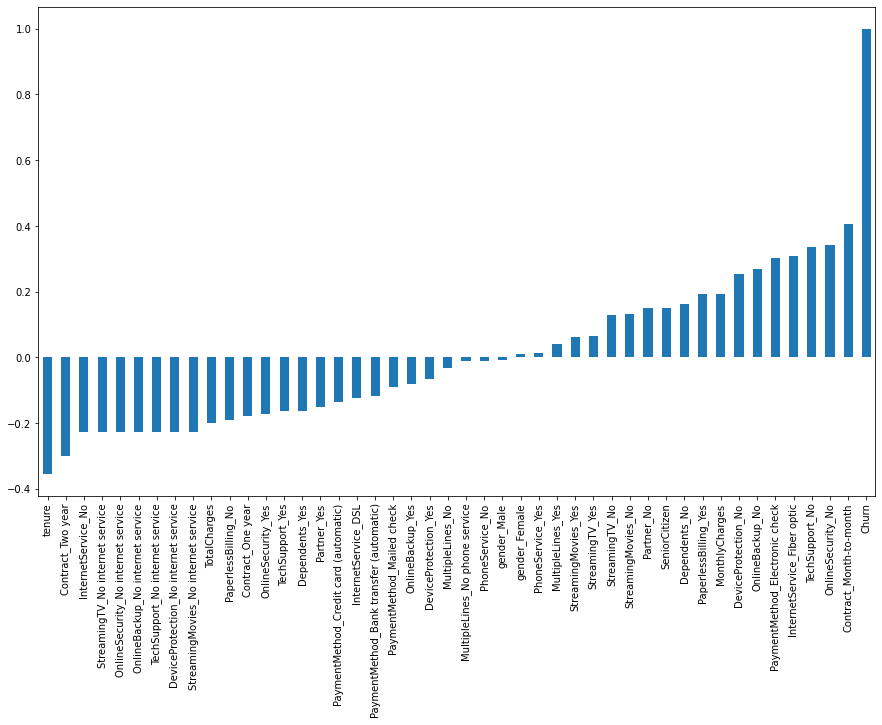

In [16]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [19]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [20]:
df_data_processing_scaled.columns = df_data_processing.columns

In [21]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [22]:
import seaborn as sns

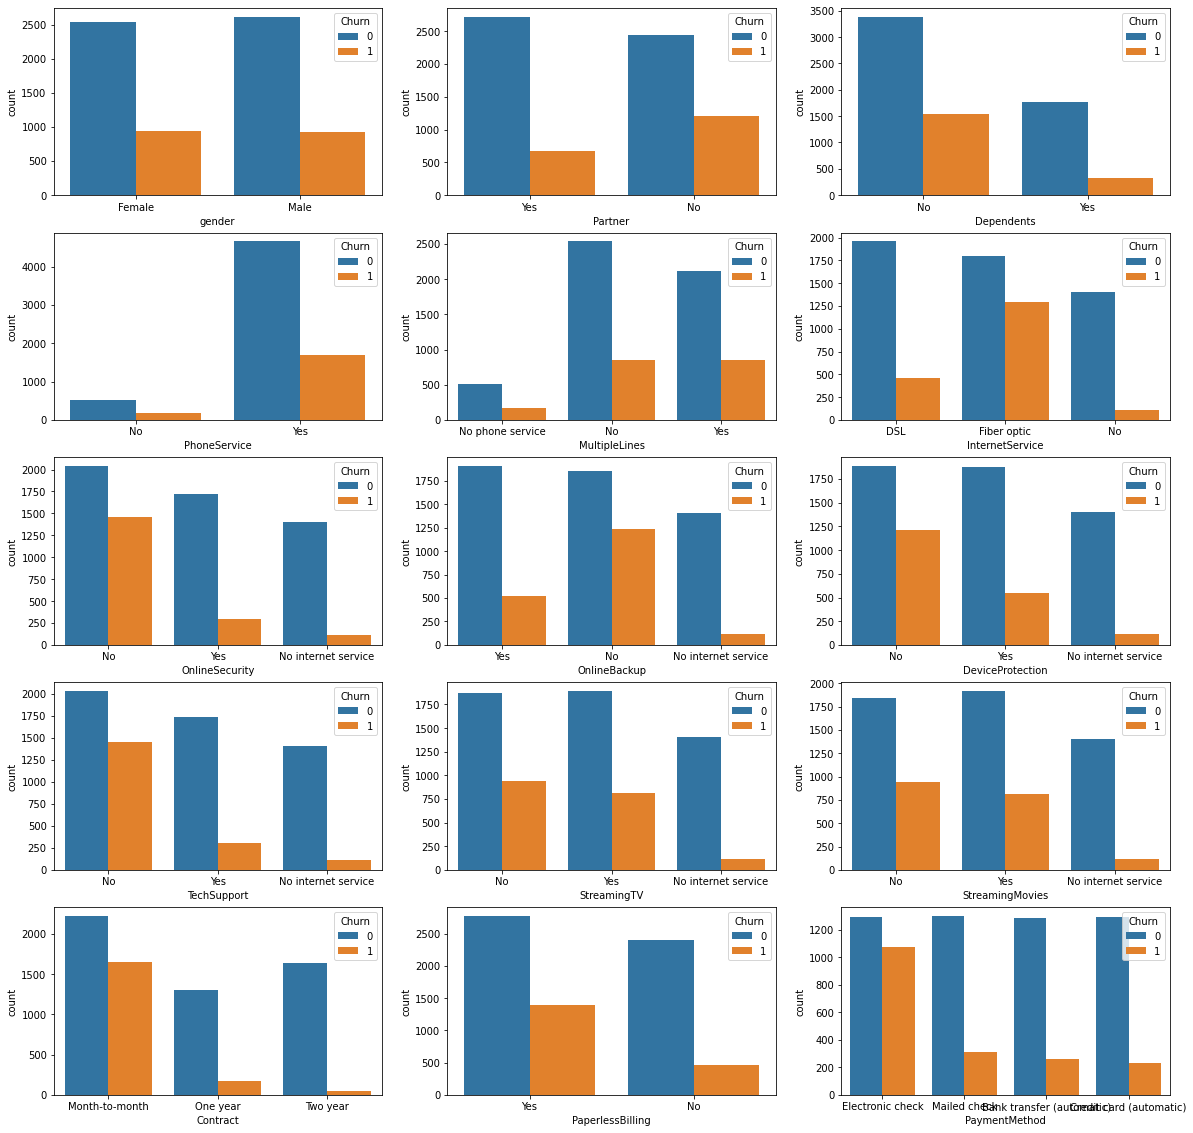

In [23]:
columns_cat = df_data.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df_data, x=var,hue='Churn', ax=ax)

#or

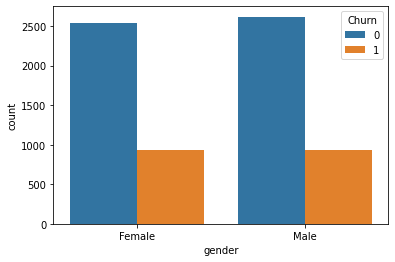

In [24]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [25]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [26]:
column_cat = df_data.select_dtypes(include='object').columns

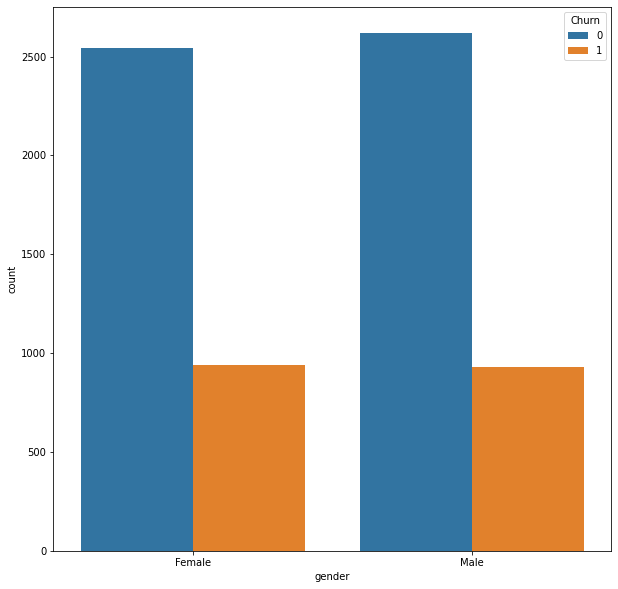

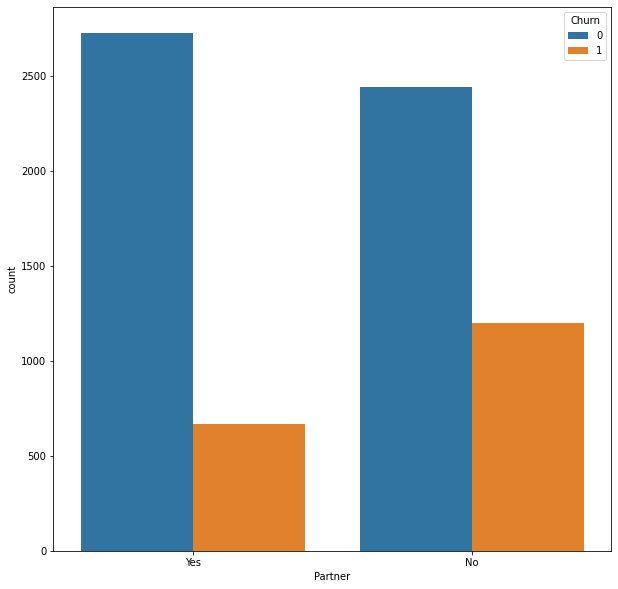

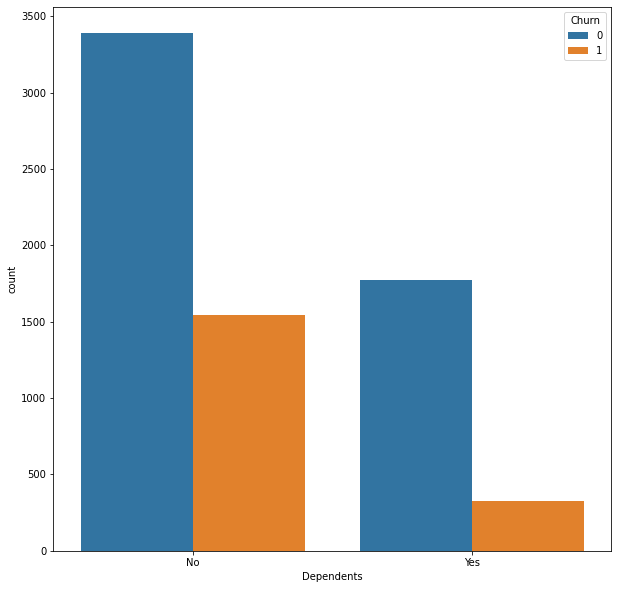

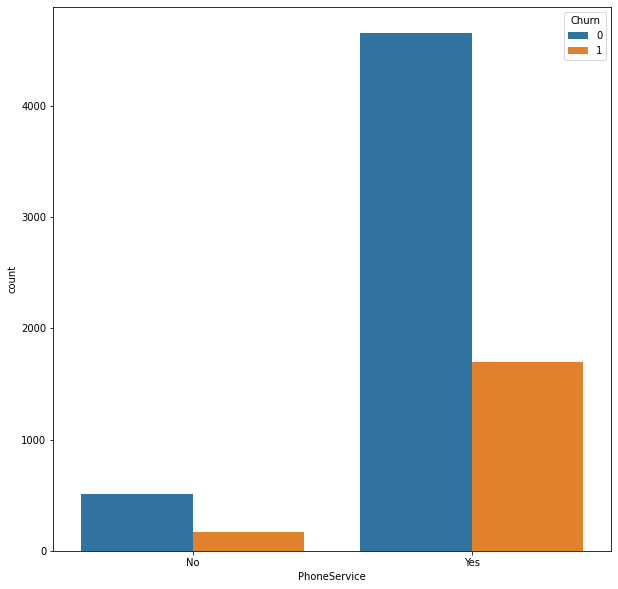

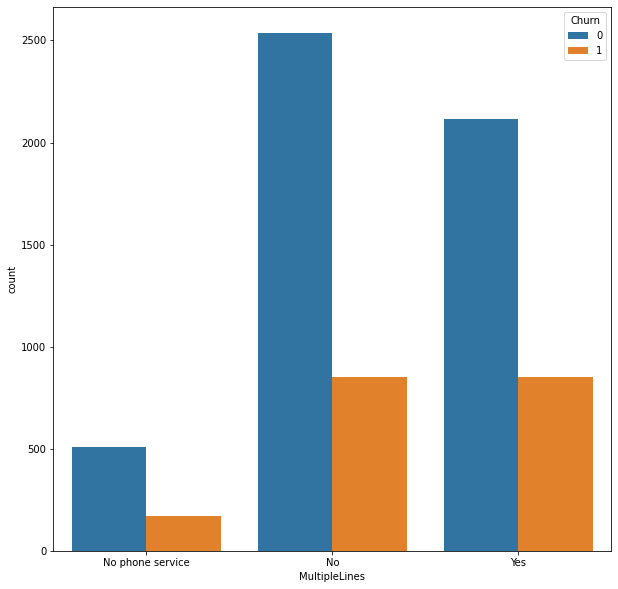

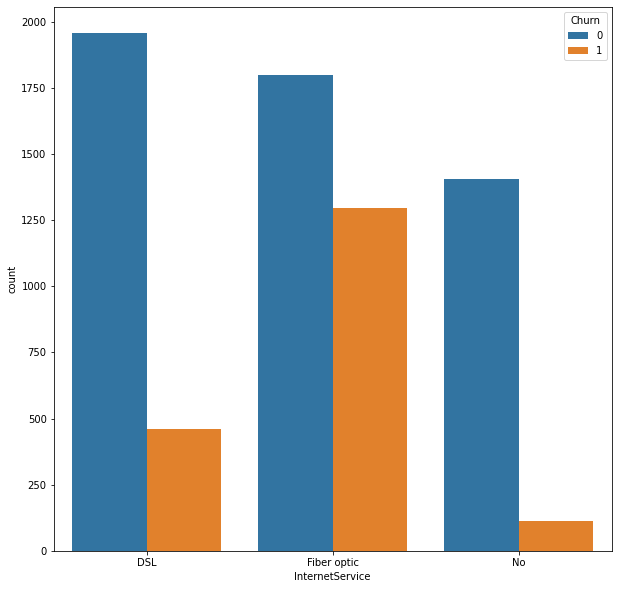

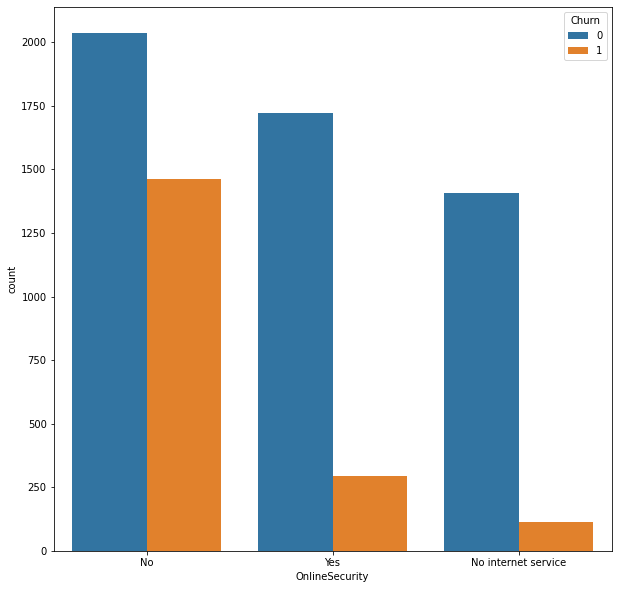

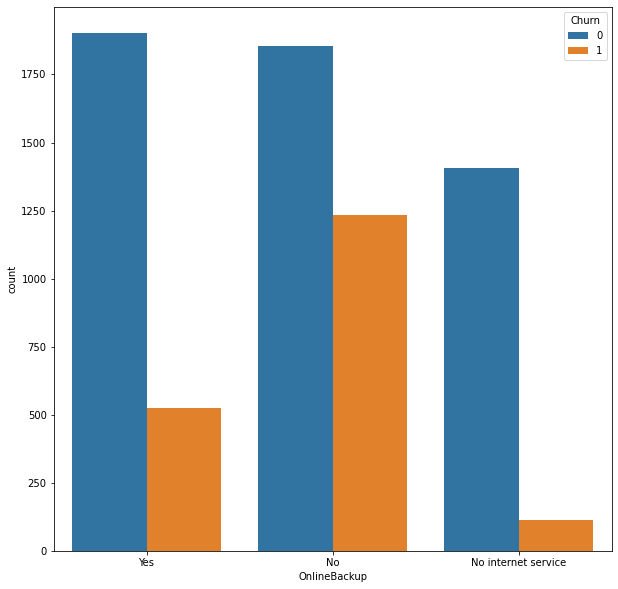

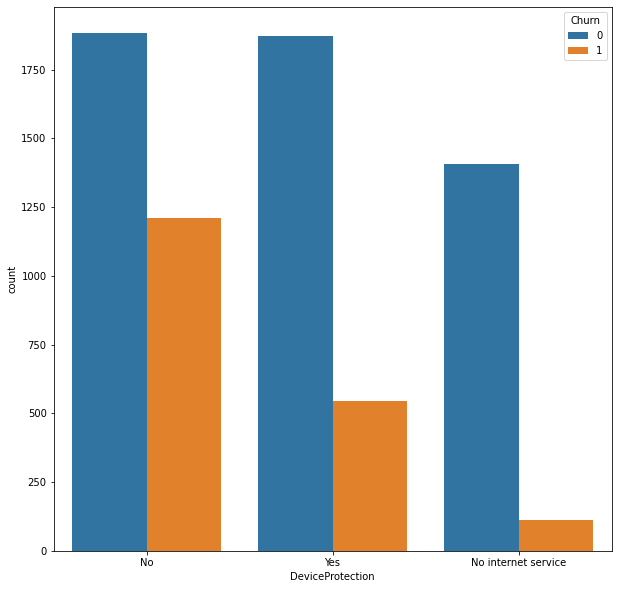

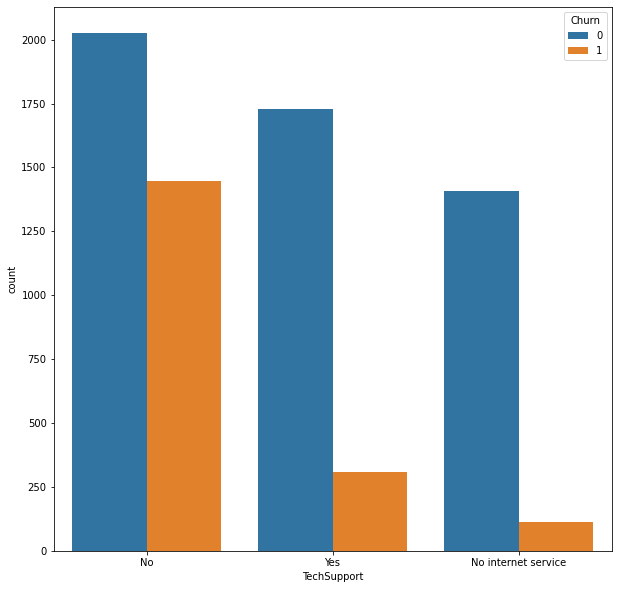

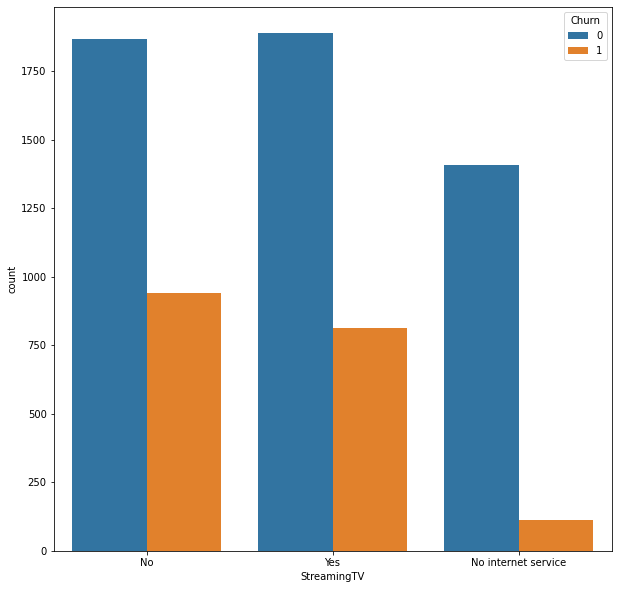

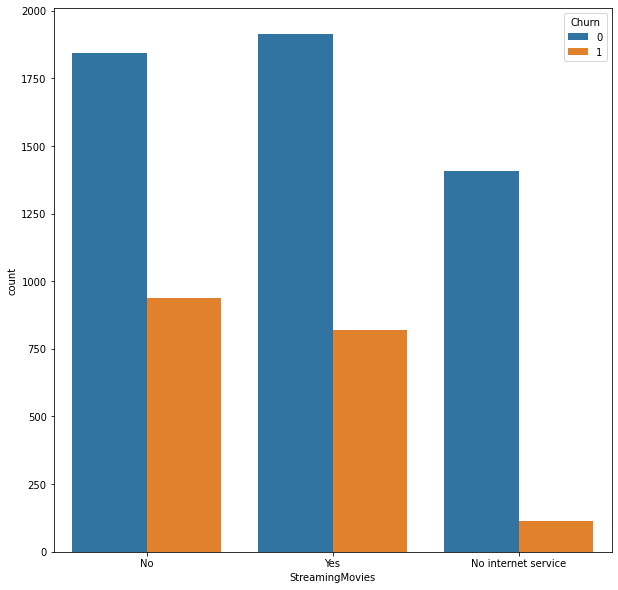

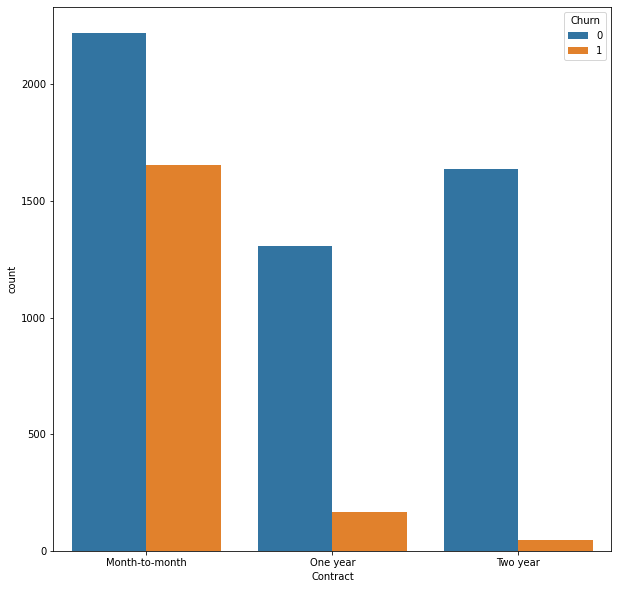

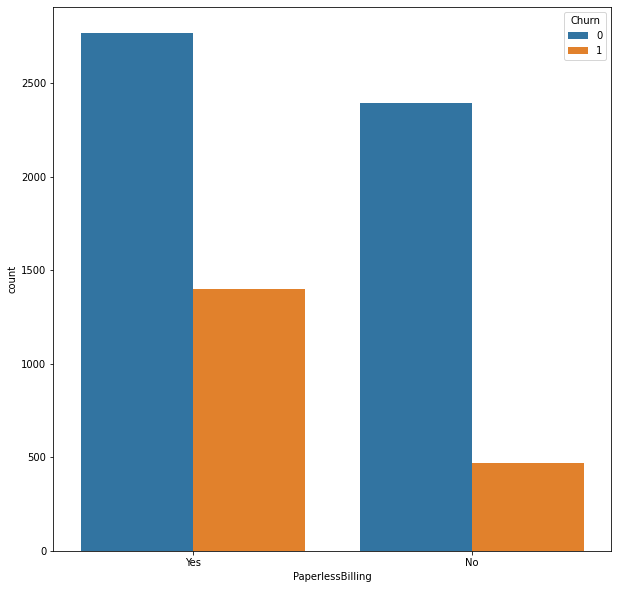

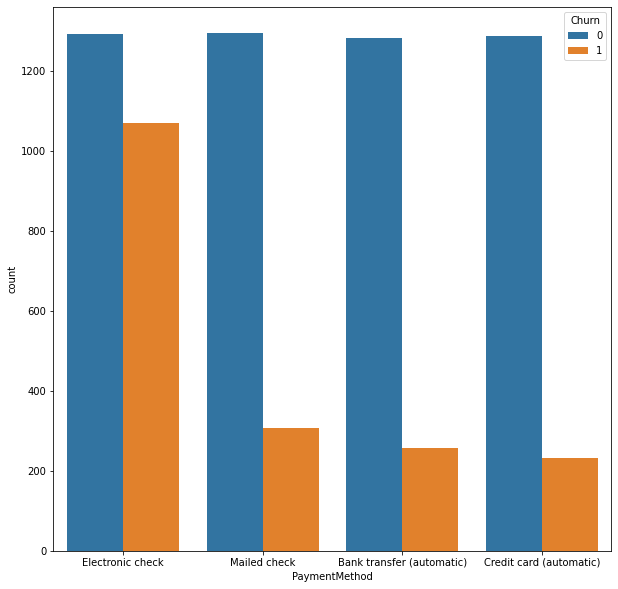

In [27]:
for _ in column_cat:
    plot_categorial(_)

## Entrenamiento del modelo de regresión logística binomial

In [28]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4922, 45)
(4922,)
(2110, 45)
(2110,)


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [32]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795260663507109


## Evaluación del modelo

In [33]:
model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [34]:
model.coef_

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [35]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.125;0.775x0.755)


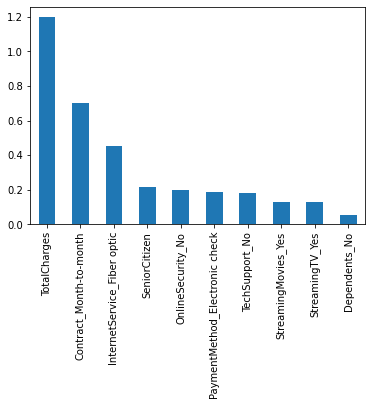

In [36]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.125;0.775x0.755)


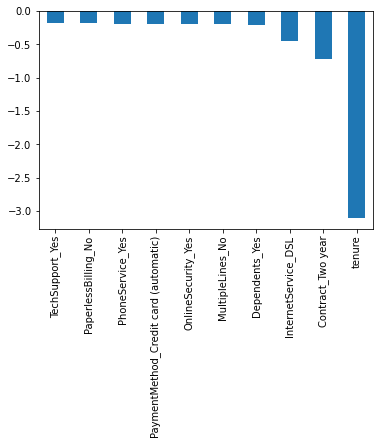

In [37]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

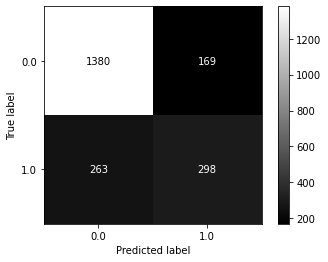

In [39]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

## Se necesita Balancear los datos

In [40]:
#Cuando se analiza la distribución de datos se observa que los valores NO representan el 73% de todos los datos lo cual 
#hace que el balance sea muy desproporcionado
df_data['Churn'].value_counts(normalize=True)*100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [41]:
#Luego de entrenar el modelo se obtiene un accuracy de 0.81 y unos valores de precision y recall muy bajos para la clase 1,
#sobretodo el F1 que tiene 0.59 algo que evidencia claramente que el modelo no esta correctamente entrenado

from sklearn.metrics import classification_report
predicciones =model.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [ ]:
#Para solucionarlo he usado la libería imbalanced-learn la cual viene instalada en GoogleColab por lo que solo se tiene 
#que importar tal como se muestra a continuación:
from imblearn.combine import SMOTEENN
imp= SMOTEENN(sampling_strategy= 0.99)
X_bal,y_bal=imp.fit_resample(X,y)

In [ ]:
(y_bal.value_counts()/y_bal.shape[0])*100

In [ ]:
#En la imagen anterior se observa como ahora las clases quedan practicamente igual,con estos nuevos X_bal & y_bal podemos entrenar el modelo (reemplazamos X_bal & y_bal en la función train_test_split y lo demás continua como se estaba haciendo. Al evaluar los resultados se observa claramente como han mejorado lo resutados pasando de un accuracy de 0.81 a 0.95 (asismo e mejora precision,recall y F1 en la clase 1).
from sklearn.metrics import classification_report
predicciones=model_bal.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))